
# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.I would be excited finding intresting patterns in the dataset

#### This data contains the following features:
    1.id : Rows unique id
    2.imdb_id : imdb unique id
    3.popularity : popularity score
    4.budget : budget of movie
    5.revenue : revenue of movie
    6.original_title : Movie title
    7.cast : cast in movie
    8.homepage : link to movie website
    9.director : movie director name
    10.tagline : tagline of movie
    11.keywords : The keywords related to the movie
    12.overview : overview of movie
    13.runtime : movie duration in minutes
    14.genres : movie category
    15.production_companies : name of company that produced movie
    16.release_date : release date of movie
    17.vote_count : vote casted by viewers or reviewers
    18.vote_average : average vote casted by viewers or reviewers
    19.release_year : year movie was released
    20.budget_adj:budget in 2010 dollars,accounting for inflation
    21.revenue_adj :revenue in 2010 dollars,accounting for inflation

### Questions for Analysis
> Q1 :Which movie genre are the most produced ?

> Q2 : what is the top 10 movies according to the popularity  ? 

> Q3 : is there any relation between the profit, budget, popularity and runtime? 

In [1]:
# import the necessary libraries for the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load and exploring the dataset to have a better understand 


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
mov_df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
# take a look for the first five rows
mov_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# view the number of  rows and columns 
mov_df.shape

(10866, 21)

In [4]:
# view some statistics
mov_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# view data set to check for correct Datatypes, null and duplicated values 
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### let's summerize what we have in the dataset:
    1. so there are 10866 rows and 21 columns
    2. there are un useful columns
    3. there are dublicated values
    4. there are null values
    5. need to correct datatypes
    6. ther are three columns (cast, genres, production_companies) have values separated with "|"


### Data Cleaning
>  let's clean the dataset to make it proper for further analysis
 

In [6]:
# drop columns that are not useful for analysis 
mov_df.drop(labels = ['imdb_id',  'homepage' , 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj'], axis = 1, inplace = True)
mov_df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [7]:
mov_df.shape

(10866, 14)

In [8]:
# print number of dublicates in our dataset
print (mov_df.duplicated().sum())

1


In [9]:
# drop dublicates in our dataset
mov_df.drop_duplicates(inplace = True)

In [10]:
# print number of duplicates again to confirm dedupe - should both be 0
print(mov_df.duplicated().sum())

0


In [11]:
# view missing value count for each feature
mov_df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [12]:
# converting any zero value in the (runtime, budget, revenue) columns to NAN then drop rows with any null values
data_zero = ['runtime', 'budget', 'revenue']
mov_df[data_zero] = mov_df[data_zero].replace(0,np.NAN)
mov_df.dropna(inplace = True)

In [13]:
#  checks if any of columns have null values - should print False
mov_df.isnull().sum().any()

False

In [14]:
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3805 non-null   int64  
 1   popularity            3805 non-null   float64
 2   budget                3805 non-null   float64
 3   revenue               3805 non-null   float64
 4   original_title        3805 non-null   object 
 5   cast                  3805 non-null   object 
 6   director              3805 non-null   object 
 7   runtime               3805 non-null   float64
 8   genres                3805 non-null   object 
 9   production_companies  3805 non-null   object 
 10  release_date          3805 non-null   object 
 11  vote_count            3805 non-null   int64  
 12  vote_average          3805 non-null   float64
 13  release_year          3805 non-null   int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 445.9+ KB


In [15]:
mov_df.shape

(3805, 14)

In [16]:
# convert releas_date column datatype from int to datatime
mov_df['release_date'] = pd.to_datetime(mov_df['release_date'])

In [17]:
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3805 non-null   int64         
 1   popularity            3805 non-null   float64       
 2   budget                3805 non-null   float64       
 3   revenue               3805 non-null   float64       
 4   original_title        3805 non-null   object        
 5   cast                  3805 non-null   object        
 6   director              3805 non-null   object        
 7   runtime               3805 non-null   float64       
 8   genres                3805 non-null   object        
 9   production_companies  3805 non-null   object        
 10  release_date          3805 non-null   datetime64[ns]
 11  vote_count            3805 non-null   int64         
 12  vote_average          3805 non-null   float64       
 13  release_year     

In [18]:
mov_df.shape

(3805, 14)

In [19]:
def divide (col_name) :
    # take the desired column and separate with "|"
    divide = mov_df[col_name].str.cat(sep = '|')
    
    # giving a panda series
    divide = pd.Series(divide.split('|'))
    
    count = divide.value_counts(ascending = False)
    
    return count

### let's summerize what we have done in the cleaning phase
    1. I dropped the un useful columns in my analysis
    2. I dropped dublicates in the dataset
    3. I converted any zero value in the (runtime, budget, revenue) columns to NAN then dropped rows with any null values
    4. I convertted releas_date column datatype from int to datatime
    5. I created a function to solve the problem of : (ther are three columns (cast, genres, production_companies) have values separated with "|")
    
    
### now there are 3805  clean row and 13 clean columns

### let's get the point!!!

<a id='eda'></a>
## Exploratory Data Analysis

> Now, I'am ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the three questions that I  posed in the Introduction section.



### Research Question 1 (Which movie gener are the most produced ?)

In [20]:
# using divide function to count the different genres
genres_count = divide('genres')
genres_count 

Drama              1729
Comedy             1335
Thriller           1194
Action             1076
Adventure           743
Romance             658
Crime               649
Science Fiction     517
Horror              459
Family              417
Fantasy             395
Mystery             343
Animation           199
Music               131
History             128
War                 119
Western              52
Documentary          26
Foreign               9
TV Movie              1
dtype: int64

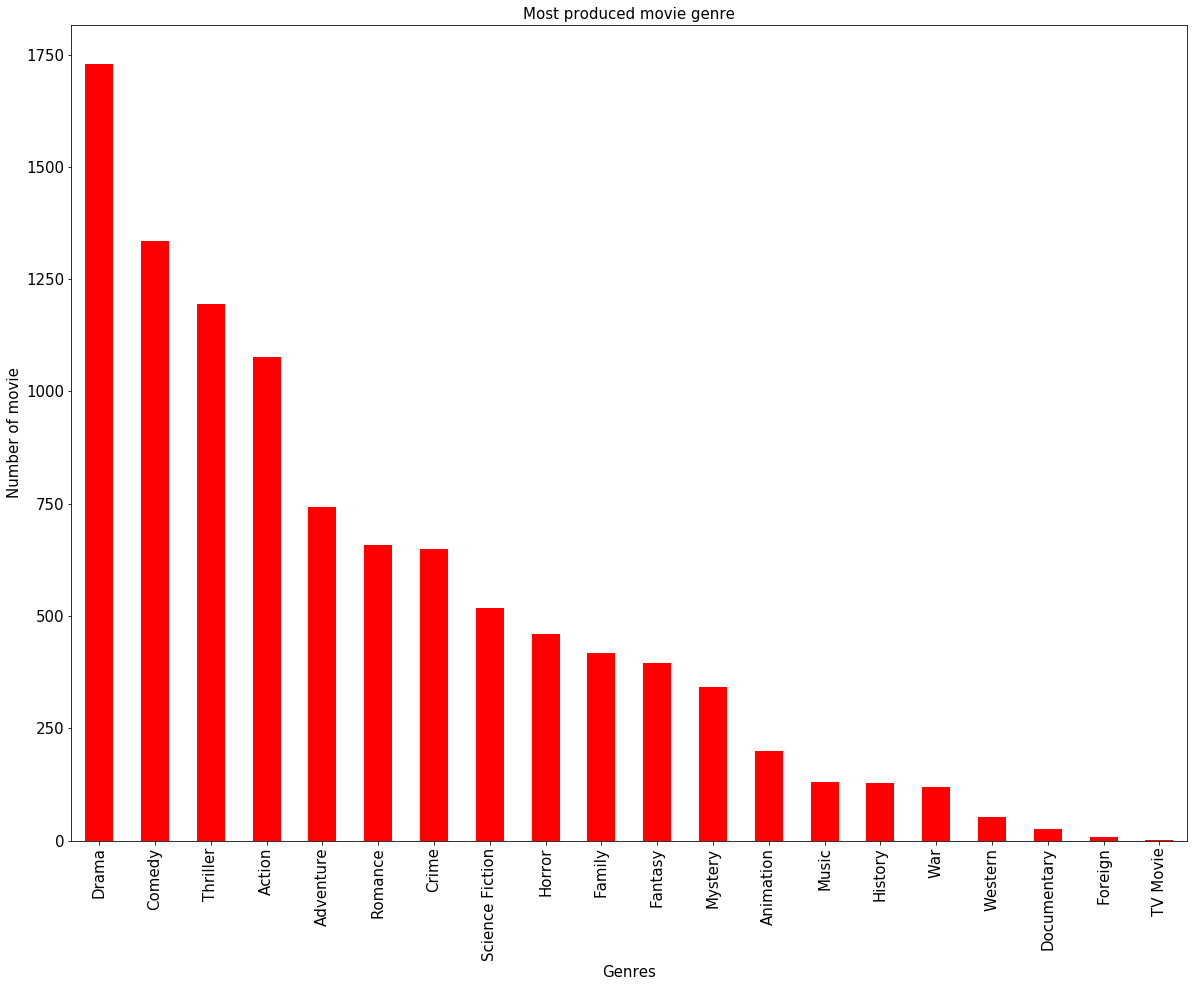

In [21]:
# plot the genres counts
genres_bar = genres_count.plot.bar(color = 'red', fontsize = 15);
genres_bar.figure.set_size_inches(20,15);
plt.title('Most produced movie genre', color = 'black', fontsize = '15');
plt.xlabel('Genres', color = 'black', fontsize = '15');
plt.ylabel('Number of movie', color = 'black', fontsize = '15');

**Oh, Drama is the most produced movie genre**

### Note : we can do the same for cast and production_companies columns. just replace the column name

### Research Question 2  (what is the top 10 movies according to the popularity ?)

In [22]:
# creating a datafarme for the top 10 movie by popularity and sorting them
df_sorted = pd.DataFrame(mov_df['popularity'].sort_values(ascending=False))[:10]
df_sorted['original_title'] = mov_df['original_title']
# set the original_title as the index
df_sorted.set_index('original_title', inplace = True)
df_sorted

,popularity
original_title,
Jurassic World,32.985763
Mad Max: Fury Road,28.419936
Interstellar,24.949134
Guardians of the Galaxy,14.311205
Insurgent,13.112507
Captain America: The Winter Soldier,12.971027
Star Wars,12.037933
John Wick,11.422751
Star Wars: The Force Awakens,11.173104


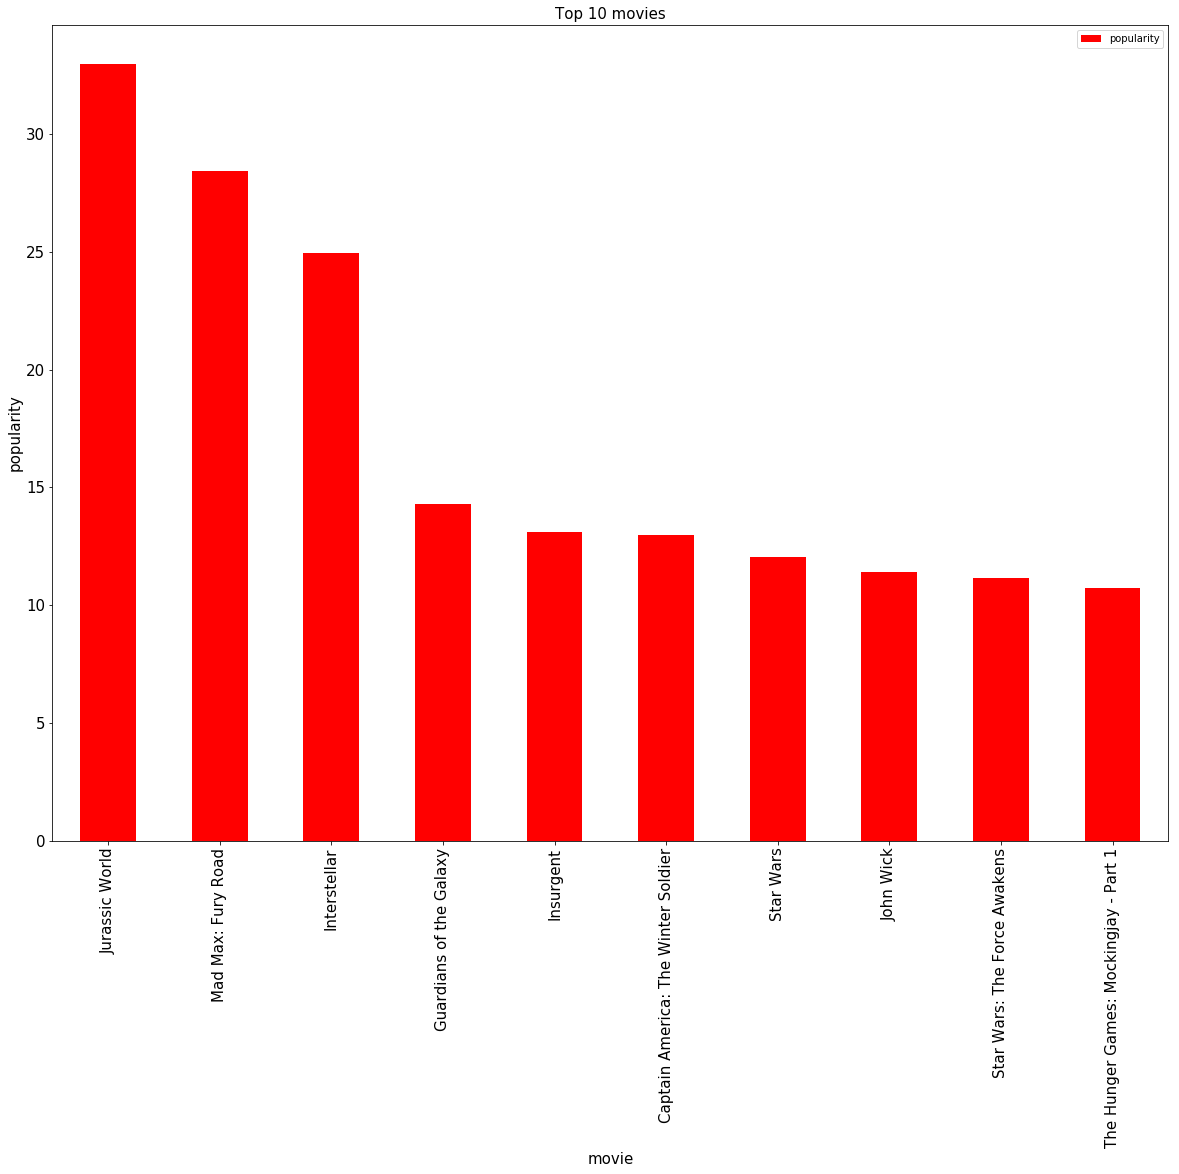

In [23]:
top10_bar = df_sorted.plot.bar(color = 'red', fontsize = 15);
top10_bar.figure.set_size_inches(20,15);
plt.title('Top 10 movies', color = 'black', fontsize = '15');
plt.xlabel('movie', color = 'black', fontsize = '15');
plt.ylabel('popularity', color = 'black', fontsize = '15');

**great!, Jurassic World is the most popular movie**

### Research Question 3  (is there any relation between the profit, budget, popularity and runtime?)

In [24]:
# add a new column (profit) by subtracting budget from revenue
mov_df['profit'] = mov_df['revenue']-mov_df['budget']
mov_df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.316249e+09


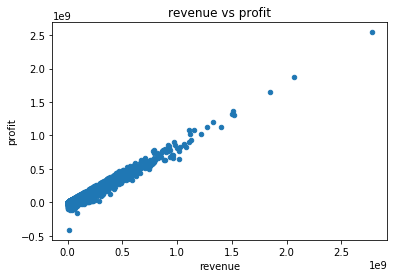

In [25]:
mov_df.plot(x = 'revenue', y = 'profit', kind = 'scatter', title ='revenue vs profit');

**The above scatter plot shows there is a strong positive correlation between  movie revenue and profit as the profit increase with the revenue**

In [26]:
mov_df['profit'].corr(mov_df['revenue'])

0.9791490191278412

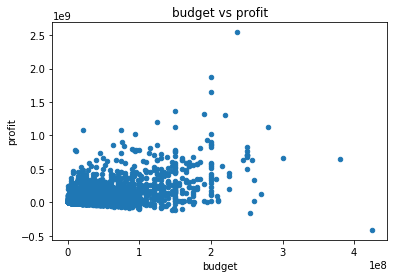

In [27]:
mov_df.plot(x = 'budget', y = 'profit', kind = 'scatter', title = 'budget vs profit');

**The above scatter plot shows there is a weak positive correlation between Movie Profit and budget. as the profit increase with the budget**

In [28]:
mov_df['profit'].corr(mov_df['budget'])

0.5251284472304991

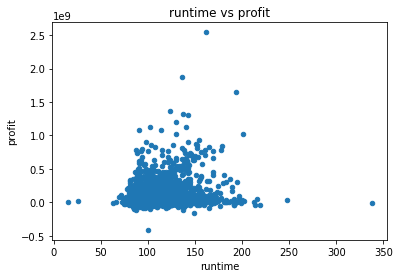

In [29]:
mov_df.plot(x = 'runtime', y = 'profit', kind = 'scatter', title = 'runtime vs profit');

**The above scatter plot shows there is a weak positive correlation between Movie Profit and runtime.**

In [30]:
mov_df['profit'].corr(mov_df['runtime'])

0.21927838835295238

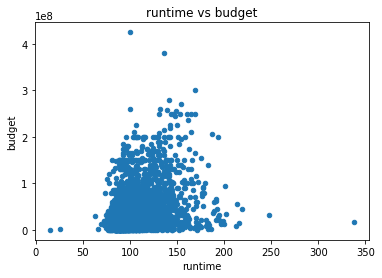

In [31]:
mov_df.plot(x = 'runtime', y = 'budget', kind = 'scatter', title = 'runtime vs budget');

**The above scatter plot shows there is a weak positive correlation between Movie budget and runtime.**

In [32]:
mov_df['runtime'].corr(mov_df['budget'])

0.25956239701259864

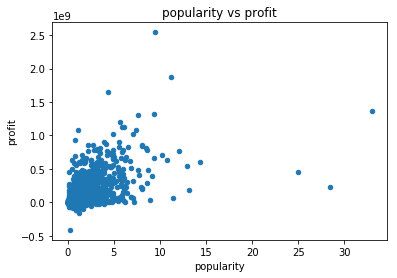

In [33]:
mov_df.plot(x = 'popularity', y = 'profit', kind = 'scatter', title = 'popularity vs profit');

**The above scatter plot shows there is a positive correlation between Movie popularity and profit. as the profit increase with popularity.** 

In [34]:
mov_df['popularity'].corr(mov_df['profit'])

0.5948676576773294

<a id='conclusions'></a>
## Conclusions

**general limitations** in this project:
>1. one duplicated row and i dropped it.
>2. some null values and i dropped the rows containing them.
>3. many rows contained 0 in the revenue , budget, and runtime and i dropped the rows containing them.


**from question 1** : we have found that Drama is the most produced movie genre by  1729 film, following by action, comedy and thriller

> **limitations** : beside the general limitations here I faced various limitations. The data in columns of (Directors,   genres,production_companies ) are seprated by '|', so I created a function to solve this problem and to track count taking a given column.


**from question 2** : we displayed the top 10 movie according to the popularity and found that Jurassic World is the most popular movie followed by Mad Max: Fury Road, Interstella, Guardians of the Galaxy,Insurgent, Captain America: The Winter Soldier, Star Wars, John Wick, Star Wars: The Force Awakens, The Hunger Games: Mockingjay - Part 1

> **limitations** :  general limitations

**from question 3** : from the various scatter plots, we can conclude that:
1. the revenue increas with profit.
2. the profit increase with budget
3. the revenue increse with popularity 
> **limitations** : beside the general limitations here no info about the profit of each movie so i created a new column by subtracting the budget from the revenue.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0